In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box

In [4]:
polygons = gpd.read_file("../data/raw/osm/wv_forest.geojson")


In [5]:
print(f"CRS: {polygons.crs}")
print(f"Number of features: {len(polygons)}")
print(f"Bounds: {polygons.total_bounds}")

CRS: EPSG:4326
Number of features: 1871
Bounds: [-80.9109509  37.5012641 -80.3434843  37.8709153]


In [6]:
bbox = (-80.87501765, 37.54651655, -80.44783835, 37.79956715)  # (west, south, east, north)
bbox_geom = box(*bbox)
bbox_gdf = gpd.GeoDataFrame(geometry=[bbox_geom], crs="EPSG:4326")

In [7]:
if polygons.crs is not None:
    bbox_gdf = bbox_gdf.to_crs(polygons.crs)

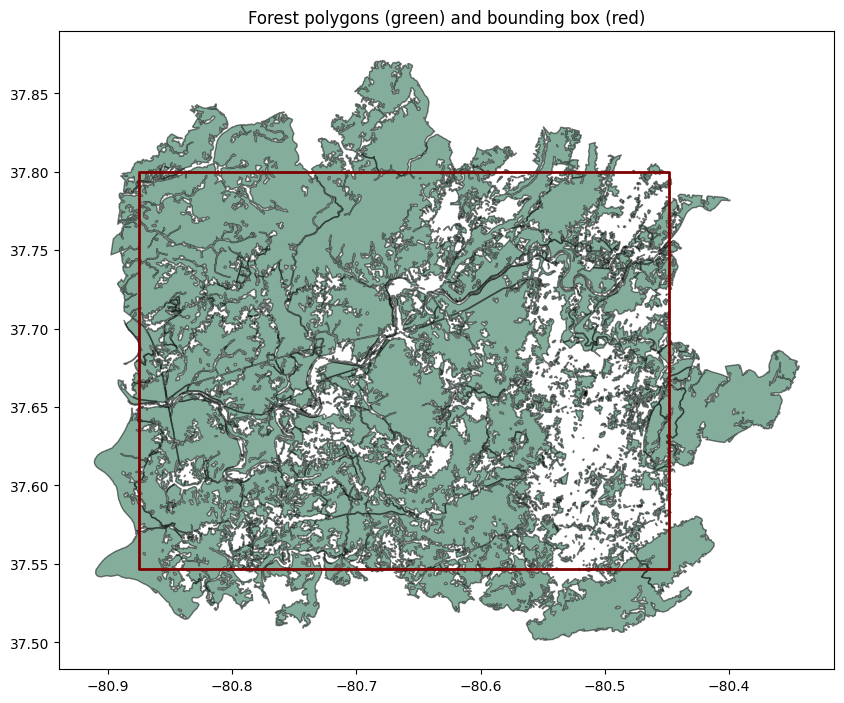

In [10]:
ax = polygons.plot(figsize=(10, 10), color="xkcd:spruce", alpha=0.5, edgecolor="black")
bbox_gdf.plot(ax=ax, facecolor="none", edgecolor="maroon", linewidth=2)
plt.title("Forest polygons (green) and bounding box (red)")
plt.show()